In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, auc

In [17]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Projects & Resources/September Placement Project/Data Set.csv")

In [18]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [19]:
df.shape

(250000, 33)

In [20]:
df=df.drop(columns=["EventId"],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df["Label"].value_counts()/df.shape[0]*100

,count
Label,
b,65.7332
s,34.2668


In [24]:
df["Label"]=df["Label"].map({"s":1,"b":0})

In [25]:
for i in df.describe().keys():
  print(i,"------",df[i].nunique())

DER_mass_MMC ------ 108338
DER_mass_transverse_met_lep ------ 101637
DER_mass_vis ------ 100558
DER_pt_h ------ 115563
DER_deltaeta_jet_jet ------ 7088
DER_mass_jet_jet ------ 68366
DER_prodeta_jet_jet ------ 16593
DER_deltar_tau_lep ------ 4692
DER_pt_tot ------ 59042
DER_sum_pt ------ 156098
DER_pt_ratio_lep_tau ------ 5931
DER_met_phi_centrality ------ 2829
DER_lep_eta_centrality ------ 1002
PRI_tau_pt ------ 59639
PRI_tau_eta ------ 4971
PRI_tau_phi ------ 6285
PRI_lep_pt ------ 61929
PRI_lep_eta ------ 4987
PRI_lep_phi ------ 6285
PRI_met ------ 87836
PRI_met_phi ------ 6285
PRI_met_sumet ------ 179740
PRI_jet_num ------ 4
PRI_jet_leading_pt ------ 86590
PRI_jet_leading_eta ------ 8558
PRI_jet_leading_phi ------ 6285
PRI_jet_subleading_pt ------ 42464
PRI_jet_subleading_eta ------ 8628
PRI_jet_subleading_phi ------ 6286
PRI_jet_all_pt ------ 103559
Weight ------ 104094
Label ------ 2


`This looks like the Higgs Boson challenge dataset from Kaggle so they explicitly state "-999 means missing value`

In [26]:
df = df.replace(-999, np.nan)

In [27]:
cols_to_drop = []

for col in df.describe().columns:
    null_percent = df[col].isna().mean() * 100
    corr_with_label = df[col].corr(df['Label'])

    if null_percent > 0:
        print(f"{col}    {round(null_percent, 2)}%   And Correlation: {round(corr_with_label, 3)}")
        cols_to_drop.append(col)





DER_mass_MMC    15.25%   And Correlation: 0.012
DER_deltaeta_jet_jet    70.98%   And Correlation: 0.328
DER_mass_jet_jet    70.98%   And Correlation: 0.317
DER_prodeta_jet_jet    70.98%   And Correlation: -0.294
DER_lep_eta_centrality    70.98%   And Correlation: 0.308
PRI_jet_leading_pt    39.97%   And Correlation: 0.109
PRI_jet_leading_eta    39.97%   And Correlation: 0.0
PRI_jet_leading_phi    39.97%   And Correlation: -0.0
PRI_jet_subleading_pt    70.98%   And Correlation: -0.023
PRI_jet_subleading_eta    70.98%   And Correlation: 0.001
PRI_jet_subleading_phi    70.98%   And Correlation: -0.006


In [28]:
df = df.drop(columns=cols_to_drop)

In [29]:
df.shape

(250000, 21)

In [30]:
df.describe().T[["min","25%","50%","75%","max"]]

,min,25%,50%,75%,max
DER_mass_transverse_met_lep,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltar_tau_lep,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,0.000000,2.841000,12.315500,27.591000,2834.999000
DER_sum_pt,46.104000,77.550000,120.664500,200.478250,1852.462000
DER_pt_ratio_lep_tau,0.047000,0.883000,1.280000,1.777000,19.773000
DER_met_phi_centrality,-1.414000,-1.371000,-0.356000,1.225000,1.414000
PRI_tau_pt,20.000000,24.591750,31.804000,45.017000,764.408000
PRI_tau_eta,-2.499000,-0.925000,-0.023000,0.898000,2.497000


In [31]:
X, y = df.drop(columns=["Label"]), df[["Label"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify=y
)

In [32]:
for col in X_train.select_dtypes(include=[np.number]).columns:
    if col not in ["PRI_jet_num"]:
      Q1 = X_train[col].quantile(0.25)
      Q3 = X_train[col].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR

      # Cap outliers in train set
      X_train[col] = X_train[col].clip(lower, upper)

      # Cap outliers in test set using same limits
      X_test[col] = X_test[col].clip(lower, upper)

- `> 1` → highly right skewed

- `0.5 – 1` → moderately right skewed

- `-0.5 – 0.5` → approximately symmetric

- `< -1` → highly left skewed

In [33]:
skew_vals = X_train.skew(numeric_only=True).sort_values(ascending=False)
print(skew_vals)


PRI_jet_all_pt                 1.165093
PRI_tau_pt                     1.104698
DER_sum_pt                     1.099283
DER_pt_h                       1.060041
PRI_lep_pt                     1.041495
DER_pt_tot                     1.022211
Weight                         0.937619
PRI_met_sumet                  0.868196
PRI_met                        0.853049
DER_pt_ratio_lep_tau           0.770962
PRI_jet_num                    0.610937
DER_mass_vis                   0.592298
DER_mass_transverse_met_lep    0.512645
DER_met_phi_centrality         0.151360
PRI_lep_eta                    0.021327
PRI_tau_eta                    0.016492
PRI_tau_phi                    0.013794
PRI_met_phi                    0.010342
PRI_lep_phi                   -0.045434
DER_deltar_tau_lep            -0.242922
dtype: float64


In [34]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
cols = ["PRI_jet_all_pt", "PRI_tau_pt", "DER_sum_pt", "DER_pt_h",
        "PRI_lep_pt", "DER_pt_tot", "Weight", "PRI_met_sumet",
        "PRI_met", "DER_pt_ratio_lep_tau", "DER_mass_vis",
        "DER_mass_transverse_met_lep"]

X_train[cols] = pt.fit_transform(X_train[cols])
X_test[cols]= pt.transform(X_test[cols])


In [35]:
skew_vals = X_train.skew(numeric_only=True).sort_values(ascending=False)
print(skew_vals)


PRI_jet_num                    0.610937
DER_met_phi_centrality         0.151360
PRI_tau_pt                     0.128725
Weight                         0.124396
PRI_lep_pt                     0.098881
DER_sum_pt                     0.061295
PRI_lep_eta                    0.021327
DER_mass_vis                   0.017782
PRI_tau_eta                    0.016492
PRI_tau_phi                    0.013794
DER_pt_ratio_lep_tau           0.012877
PRI_met_phi                    0.010342
PRI_met_sumet                 -0.015714
PRI_met                       -0.028938
PRI_lep_phi                   -0.045434
DER_pt_tot                    -0.061279
DER_pt_h                      -0.132481
PRI_jet_all_pt                -0.156553
DER_mass_transverse_met_lep   -0.176934
DER_deltar_tau_lep            -0.242922
dtype: float64


In [36]:
X_train.corr()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
DER_mass_transverse_met_lep,1.000000,0.111364,-0.299641,0.054264,-0.026058,-0.219592,0.358568,-0.455711,-0.232022,-0.003637,0.001987,0.280440,-0.010176,0.001117,0.240189,-0.015153,-0.230505,-0.241887,-0.281707,0.493117
DER_mass_vis,0.111364,1.000000,-0.071886,0.654415,-0.015656,0.144891,0.017382,-0.087564,0.351841,0.001560,-0.008568,0.416752,0.000453,-0.000938,-0.166505,0.001353,0.047497,-0.055816,-0.058360,0.015138
DER_pt_h,-0.299641,-0.071886,1.000000,-0.467085,0.414660,0.790776,-0.043620,0.661162,0.239296,0.006448,0.004138,0.197853,0.017246,-0.005041,0.437393,0.010950,0.777961,0.720344,0.826528,-0.463001
DER_deltar_tau_lep,0.054264,0.654415,-0.467085,1.000000,-0.120137,-0.371284,0.100828,-0.208123,-0.140872,0.002102,-0.012424,-0.025904,-0.001127,-0.000162,-0.405327,-0.001376,-0.370524,-0.349733,-0.394538,0.155949
DER_pt_tot,-0.026058,-0.015656,0.414660,-0.120137,1.000000,0.240220,-0.002907,0.211046,0.062360,0.005489,-0.000112,0.060846,0.010912,-0.003427,0.168302,0.000908,0.462306,0.296466,0.219320,-0.190426
DER_sum_pt,-0.219592,0.144891,0.790776,-0.371284,0.240220,1.000000,-0.057881,0.508632,0.424510,0.006805,0.000830,0.385464,0.015583,-0.002829,0.380734,0.010706,0.817255,0.855447,0.901684,-0.492713
DER_pt_ratio_lep_tau,0.358568,0.017382,-0.043620,0.100828,-0.002907,-0.057881,1.000000,-0.096255,-0.723430,-0.001201,0.000905,0.632829,-0.001892,-0.005978,0.029732,-0.003491,-0.103873,-0.034032,-0.041987,0.302885
DER_met_phi_centrality,-0.455711,-0.087564,0.661162,-0.208123,0.211046,0.508632,-0.096255,1.000000,0.152327,0.006435,-0.000580,0.014507,0.013976,-0.001990,0.142582,0.010261,0.481780,0.490701,0.571163,-0.458601
PRI_tau_pt,-0.232022,0.351841,0.239296,-0.140872,0.062360,0.424510,-0.723430,0.152327,1.000000,-0.001062,-0.003589,0.022736,0.000843,0.003934,0.048754,0.004206,0.352736,0.181064,0.207086,-0.382318
PRI_tau_eta,-0.003637,0.001560,0.006448,0.002102,0.005489,0.006805,-0.001201,0.006435,-0.001062,1.000000,-0.002486,-0.003392,0.558833,0.001977,0.001803,0.001454,0.006777,0.009259,0.009514,-0.005220


In [37]:

X_train_vif = X_train.loc[:, X_train.nunique() > 1].copy()

target = 'Label'
if target in X_train_vif.columns:
    X_train_vif = X_train_vif.drop(columns=[target])

# VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

print(vif_data)

                        Feature        VIF
0   DER_mass_transverse_met_lep   2.004419
1                  DER_mass_vis   2.380202
2                      DER_pt_h   6.061215
3            DER_deltar_tau_lep   8.060528
4                    DER_pt_tot   1.637768
5                    DER_sum_pt  21.133212
6          DER_pt_ratio_lep_tau  18.427979
7        DER_met_phi_centrality   2.135599
8                    PRI_tau_pt  12.649882
9                   PRI_tau_eta   1.454335
10                  PRI_tau_phi   1.047010
11                   PRI_lep_pt  10.098926
12                  PRI_lep_eta   1.455220
13                  PRI_lep_phi   1.046974
14                      PRI_met   1.794596
15                  PRI_met_phi   1.002365
16                PRI_met_sumet   4.256301
17                  PRI_jet_num  13.166819
18               PRI_jet_all_pt  16.053289
19                       Weight   1.811286


In [38]:
X_train=X_train.drop(columns=["DER_sum_pt","DER_pt_ratio_lep_tau","PRI_jet_num"],axis=1)
X_test=X_test.drop(columns=["DER_sum_pt","DER_pt_ratio_lep_tau","PRI_jet_num"],axis=1)

In [39]:
X_train_vif = X_train.loc[:, X_train.nunique() > 1].copy()

# VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

print(vif_data)

                        Feature       VIF
0   DER_mass_transverse_met_lep  1.974754
1                  DER_mass_vis  1.702645
2                      DER_pt_h  5.864412
3            DER_deltar_tau_lep  1.105035
4                    DER_pt_tot  1.558858
5        DER_met_phi_centrality  2.120195
6                    PRI_tau_pt  1.625269
7                   PRI_tau_eta  1.454325
8                   PRI_tau_phi  1.046944
9                    PRI_lep_pt  1.613037
10                  PRI_lep_eta  1.455176
11                  PRI_lep_phi  1.046948
12                      PRI_met  1.659424
13                  PRI_met_phi  1.002346
14                PRI_met_sumet  3.704738
15               PRI_jet_all_pt  4.159834
16                       Weight  1.790855


In [40]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred),2))
print("Testing Score",round(accuracy_score(y_test, y_test_pred),2))

Training Score 1.0
Testing Score 1.0


In [41]:
cvs=cross_val_score(model,X_train,y_train,cv=5)

print([f"{round(Score,2)}" for Score in cvs])#scores at each fold
print("Testing Mean",round(cvs.mean(),2))

['1.0', '1.0', '1.0', '1.0', '1.0']
Testing Mean 1.0


In [42]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



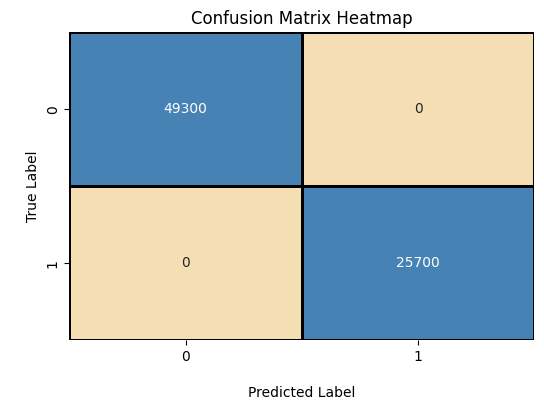

In [43]:
cm = confusion_matrix(y_test, y_test_pred)
colors = ["#F5DEB3", "#4682B4"]
cmap = sns.color_palette(colors, as_cmap=True)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=1, linecolor='black')
plt.xlabel("\nPredicted Label")
plt.ylabel("\nTrue Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

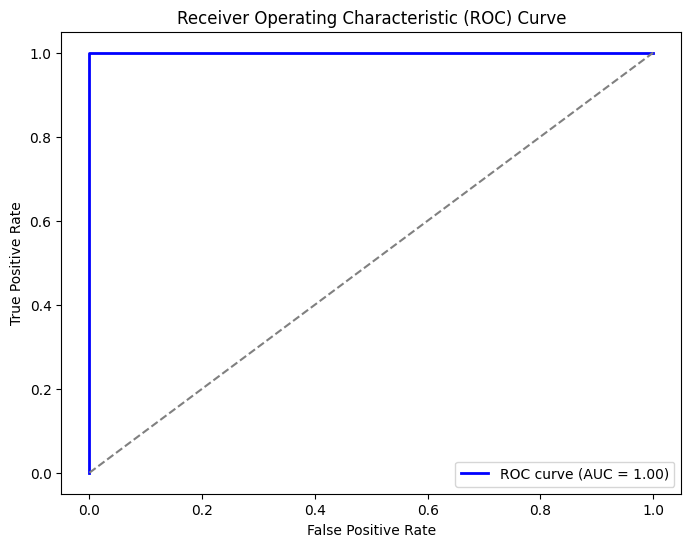

In [44]:
y_true = y_test
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)


roc_auc = auc(fpr, tpr)



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()